In [1]:
# restore variables from Data-Frame-Spring-2017(Scores,LOC,Survey,D3).ipynb

%store -r bogota0
%store -r bogota1
%store -r bogota2
%store -r bogota3

# restore variables from Functional-Basic-Preprocessing.ipynb

%store -r overall_phase1
%store -r overall_phase2
%store -r overall_phase3
%store -r overall_phase4
%store -r overall_phase5

%store -r df1
%store -r df2
%store -r df3
%store -r df4

%store -r df1_bogota0
%store -r df2_bogota0
%store -r df3_bogota0
%store -r df4_bogota0

%store -r df1_bogota1
%store -r df2_bogota1
%store -r df3_bogota1
%store -r df4_bogota1

%store -r df1_bogota2
%store -r df2_bogota2
%store -r df3_bogota2
%store -r df4_bogota2

# restore variables to be used in template similarity with best score

%store -r phase1_group0
%store -r phase1_group1
%store -r phase1_group2
%store -r phase1_group3

%store -r phase2_group0
%store -r phase2_group1
%store -r phase2_group2
%store -r phase2_group3

%store -r phase3_group0
%store -r phase3_group1
%store -r phase3_group2
%store -r phase3_group3

%store -r phase4_group0
%store -r phase4_group1
%store -r phase4_group2
%store -r phase4_group3

%store -r phase5_group0
%store -r phase5_group1
%store -r phase5_group2
%store -r phase5_group3

# restore variables to be used in correlation plot between best and template similarity

%store -r mean_log_template_bogota0
%store -r mean_log_template_bogota1
%store -r mean_log_template_bogota2
%store -r mean_log_template_bogota3

%store -r median_log_template_bogota0
%store -r median_log_template_bogota1
%store -r median_log_template_bogota2
%store -r median_log_template_bogota3

# load the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import inspect
from scipy.stats import ttest_ind

## Performance Distance from the Best

In [2]:
# append all dataframes from all groups

bogota0['group'] = 0
bogota1['group'] = 1
bogota2['group'] = 2
bogota3['group'] = 3

bogota01 = bogota0.append(bogota1, ignore_index=True)
bogota12 = bogota01.append(bogota2, ignore_index=True)
bogota_final = bogota12.append(bogota3, ignore_index=True)

In [3]:
# get max total score for each group

bogota_final['total-max-phase1'] = bogota_final.groupby(["Group"])['total-phase1'].transform(np.max)
bogota_final['total-max-phase2'] = bogota_final.groupby(["Group"])['total-phase2'].transform(np.max)
bogota_final['total-max-phase3'] = bogota_final.groupby(["Group"])['total-phase3'].transform(np.max)
bogota_final['total-max-phase4'] = bogota_final.groupby(["Group"])['total-phase4'].transform(np.max)
bogota_final['total-max-phase5'] = bogota_final.groupby(["Group"])['total-phase5'].transform(np.max)

In [4]:
# create new column for max performance distance in the dataframe

bogota_final['perform_diff_best_phase1'] = bogota_final['total-phase1'] - bogota_final['total-max-phase1']
bogota_final['perform_diff_best_phase2'] = bogota_final['total-phase2'] - bogota_final['total-max-phase2']
bogota_final['perform_diff_best_phase3'] = bogota_final['total-phase3'] - bogota_final['total-max-phase3']
bogota_final['perform_diff_best_phase4'] = bogota_final['total-phase4'] - bogota_final['total-max-phase4']
bogota_final['perform_diff_best_phase5'] = bogota_final['total-phase5'] - bogota_final['total-max-phase5']


In [5]:
bogota0_phase1_high = bogota_final.loc[bogota_final['total-phase1']==bogota_final['total-max-phase1'], 'Student'].iloc[0]
bogota1_phase1_high = bogota_final.loc[bogota_final['total-phase1']==bogota_final['total-max-phase1'], 'Student'].iloc[1]
bogota2_phase1_high = bogota_final.loc[bogota_final['total-phase1']==bogota_final['total-max-phase1'], 'Student'].iloc[2]
bogota3_phase1_high = bogota_final.loc[bogota_final['total-phase1']==bogota_final['total-max-phase1'], 'Student'].iloc[3]

bogota0_phase2_high = bogota_final.loc[bogota_final['total-phase2']==bogota_final['total-max-phase2'], 'Student'].iloc[0]
bogota1_phase2_high = bogota_final.loc[bogota_final['total-phase2']==bogota_final['total-max-phase2'], 'Student'].iloc[1]
bogota2_phase2_high = bogota_final.loc[bogota_final['total-phase2']==bogota_final['total-max-phase2'], 'Student'].iloc[2]
bogota3_phase2_high = bogota_final.loc[bogota_final['total-phase2']==bogota_final['total-max-phase2'], 'Student'].iloc[3]

bogota0_phase3_high = bogota_final.loc[bogota_final['total-phase3']==bogota_final['total-max-phase3'], 'Student'].iloc[0]
bogota1_phase3_high = bogota_final.loc[bogota_final['total-phase3']==bogota_final['total-max-phase3'], 'Student'].iloc[1]
bogota2_phase3_high = bogota_final.loc[bogota_final['total-phase3']==bogota_final['total-max-phase3'], 'Student'].iloc[2]
bogota3_phase3_high = bogota_final.loc[bogota_final['total-phase3']==bogota_final['total-max-phase3'], 'Student'].iloc[3]

bogota0_phase4_high = bogota_final.loc[bogota_final['total-phase4']==bogota_final['total-max-phase4'], 'Student'].iloc[0]
bogota1_phase4_high = bogota_final.loc[bogota_final['total-phase4']==bogota_final['total-max-phase4'], 'Student'].iloc[1]
bogota2_phase4_high = bogota_final.loc[bogota_final['total-phase4']==bogota_final['total-max-phase4'], 'Student'].iloc[2]
bogota3_phase4_high = bogota_final.loc[bogota_final['total-phase4']==bogota_final['total-max-phase4'], 'Student'].iloc[3]

bogota0_phase5_high = bogota_final.loc[bogota_final['total-phase5']==bogota_final['total-max-phase5'], 'Student'].iloc[0]
bogota1_phase5_high = bogota_final.loc[bogota_final['total-phase5']==bogota_final['total-max-phase5'], 'Student'].iloc[1]
bogota2_phase5_high = bogota_final.loc[bogota_final['total-phase5']==bogota_final['total-max-phase5'], 'Student'].iloc[2]
bogota3_phase5_high = bogota_final.loc[bogota_final['total-phase5']==bogota_final['total-max-phase5'], 'Student'].iloc[3]


## Before Absolute

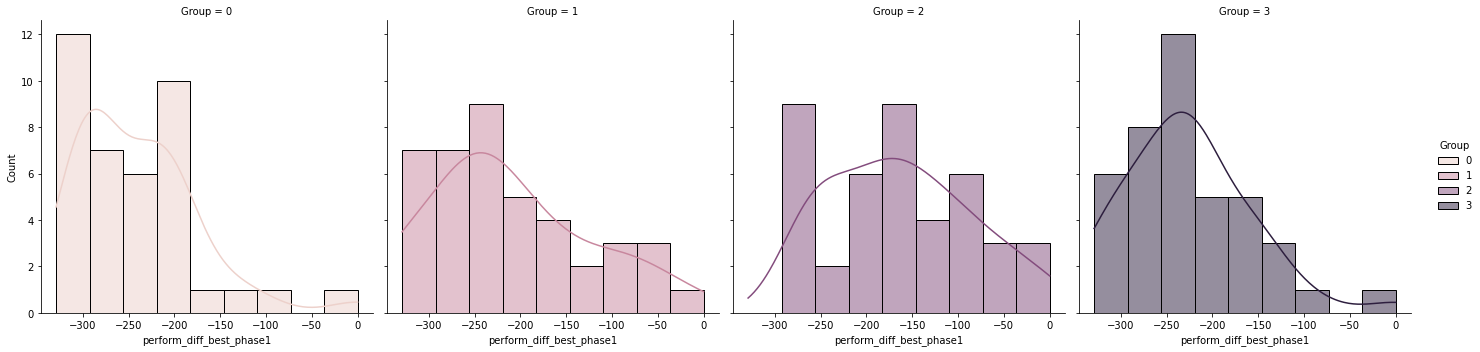

In [6]:
sns.displot(x='perform_diff_best_phase1', data=bogota_final, hue="Group", col="Group", kde=True)

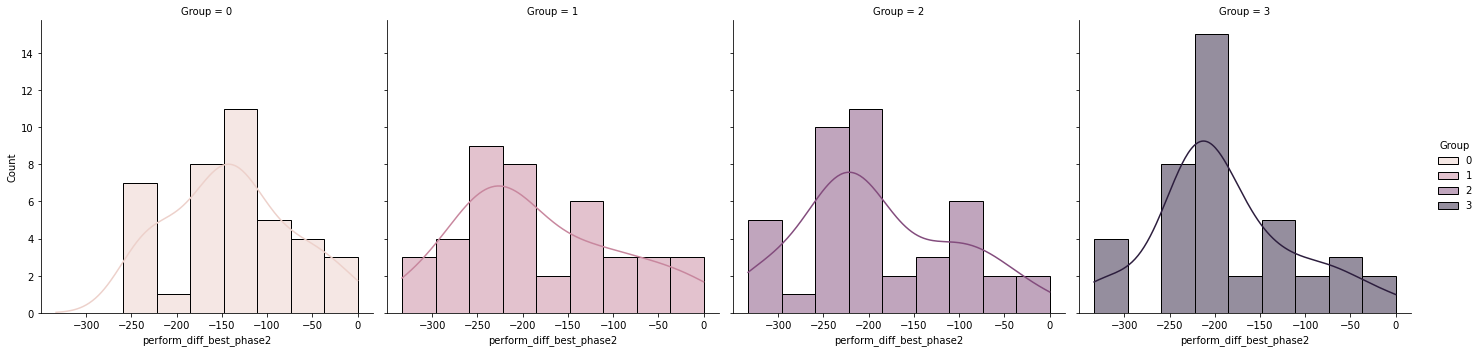

In [7]:
sns.displot(x='perform_diff_best_phase2', data=bogota_final, hue="Group", col="Group", kde=True)

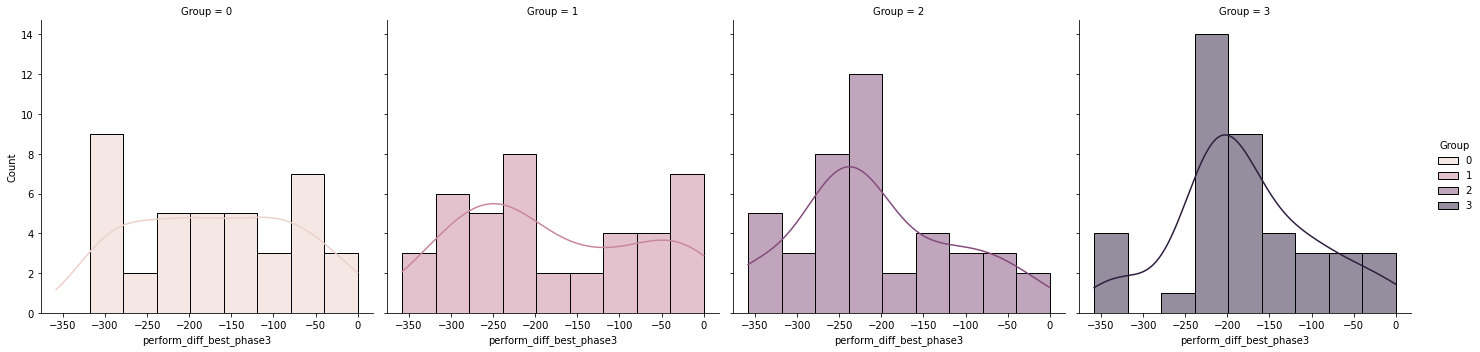

In [8]:
sns.displot(x='perform_diff_best_phase3', data=bogota_final, hue="Group", col="Group", kde=True)

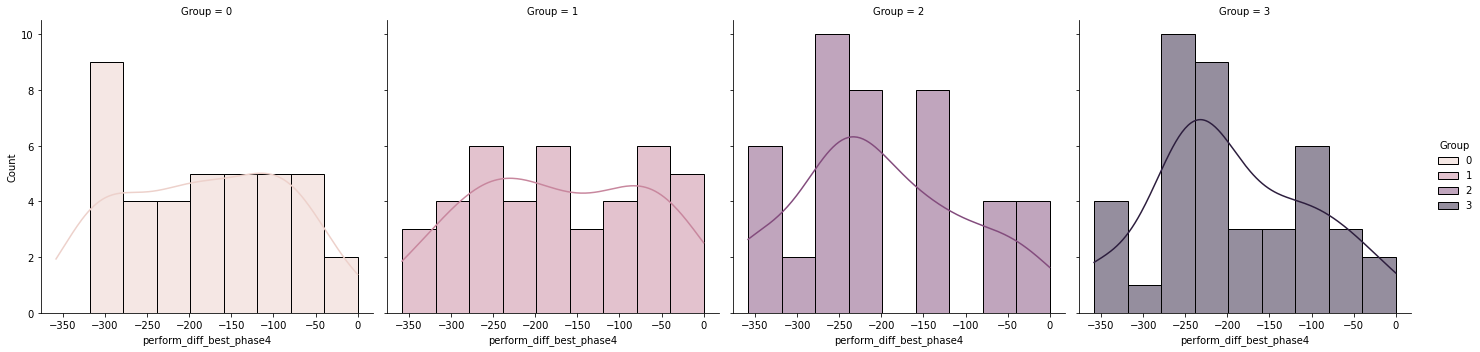

In [9]:
sns.displot(x='perform_diff_best_phase4', data=bogota_final, hue="Group", col="Group", kde=True)

## After Absolute 

In [10]:
bogota_final['abs_perform_diff_best_phase1'] = bogota_final['perform_diff_best_phase1'].abs()
bogota_final['abs_perform_diff_best_phase2'] = bogota_final['perform_diff_best_phase2'].abs()
bogota_final['abs_perform_diff_best_phase3'] = bogota_final['perform_diff_best_phase3'].abs()
bogota_final['abs_perform_diff_best_phase4'] = bogota_final['perform_diff_best_phase4'].abs()
bogota_final['abs_perform_diff_best_phase5'] = bogota_final['perform_diff_best_phase5'].abs()

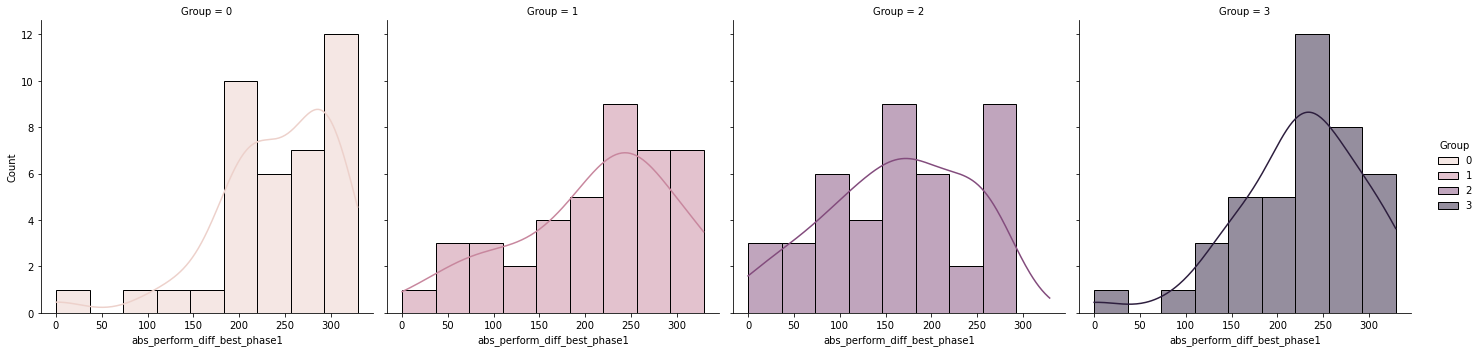

In [11]:
sns.displot(x='abs_perform_diff_best_phase1', data=bogota_final, hue="Group", col="Group", kde=True)

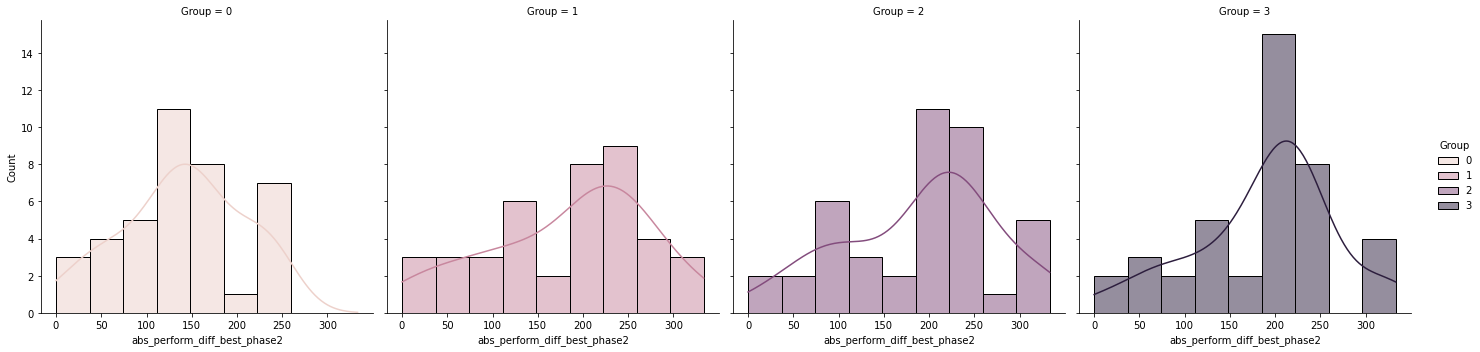

In [12]:
sns.displot(x='abs_perform_diff_best_phase2', data=bogota_final, hue="Group", col="Group", kde=True)

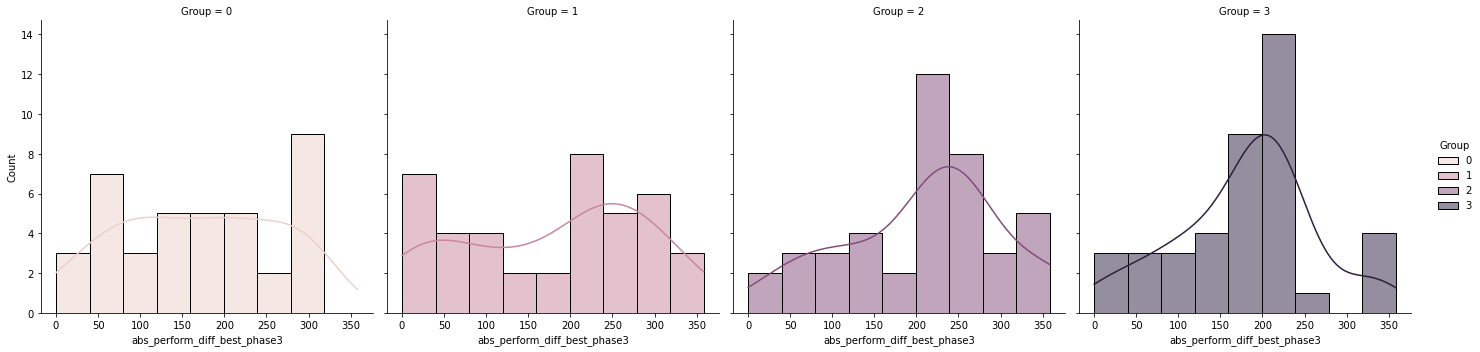

In [13]:
sns.displot(x='abs_perform_diff_best_phase3', data=bogota_final, hue="Group", col="Group", kde=True)

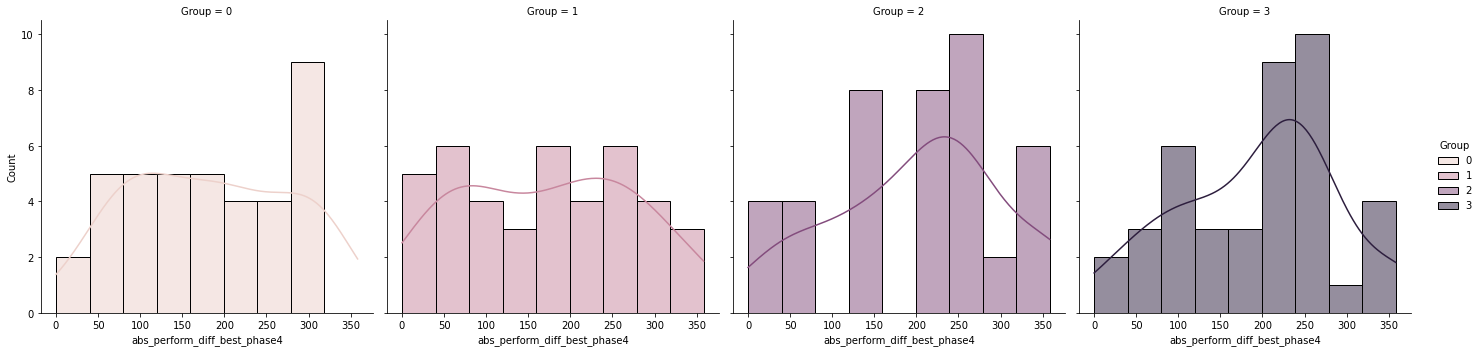

In [14]:
sns.displot(x='abs_perform_diff_best_phase4', data=bogota_final, hue="Group", col="Group", kde=True)

In [15]:
group0 = bogota_final[bogota_final['Group'] == 0]
group1 = bogota_final[bogota_final['Group'] == 1]
group2 = bogota_final[bogota_final['Group'] == 2]
group3 = bogota_final[bogota_final['Group'] == 3]

In [16]:
mean_log_perform_bogota3 = []
mean_log_perform_bogota2 = []
mean_log_perform_bogota1 = []
mean_log_perform_bogota0 = []

median_log_perform_bogota3 = []
median_log_perform_bogota2 = []
median_log_perform_bogota1 = []
median_log_perform_bogota0 = []

min_log_bogota3 = []
min_log_bogota2 = []
min_log_bogota1 = []
min_log_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []


for df in [group0['abs_perform_diff_best_phase1'], group0['abs_perform_diff_best_phase2'], group0['abs_perform_diff_best_phase3'], group0['abs_perform_diff_best_phase4'], group0['abs_perform_diff_best_phase5']]:
    mean_value = df.mean()
    median_value = df.median()
    median_log_perform_bogota3.append(median_value)
    min_value = df.min()
    min_log_bogota3.append(min_value)
    max_value = df.max()
    max_log_bogota3.append(max_value)
    mean_log_perform_bogota3.append(mean_value)

for df in [group1['abs_perform_diff_best_phase1'], group1['abs_perform_diff_best_phase2'], group1['abs_perform_diff_best_phase3'], group1['abs_perform_diff_best_phase4'], group1['abs_perform_diff_best_phase5']]:
    mean_value = df.mean()
    median_value = df.median()
    median_log_perform_bogota2.append(median_value)
    min_value = df.min()
    min_log_bogota2.append(min_value)
    max_value = df.max()
    max_log_bogota2.append(max_value)
    mean_log_perform_bogota2.append(mean_value)
    
for df in [group2['abs_perform_diff_best_phase1'], group2['abs_perform_diff_best_phase2'], group2['abs_perform_diff_best_phase3'], group2['abs_perform_diff_best_phase4'], group2['abs_perform_diff_best_phase5']]:
    mean_value = df.mean()
    median_value = df.median()
    median_log_perform_bogota1.append(median_value)
    min_value = df.min()
    min_log_bogota1.append(min_value)
    max_value = df.max()
    max_log_bogota1.append(max_value)
    mean_log_perform_bogota1.append(mean_value)

for df in [group3['abs_perform_diff_best_phase1'], group3['abs_perform_diff_best_phase2'], group3['abs_perform_diff_best_phase3'], group3['abs_perform_diff_best_phase4'], group3['abs_perform_diff_best_phase5']]:
    mean_value = df.mean()
    median_value = df.median()
    median_log_perform_bogota0.append(median_value)
    min_value = df.min()
    min_log_bogota0.append(min_value)
    max_value = df.max()
    max_log_bogota0.append(max_value)
    mean_log_perform_bogota0.append(mean_value)

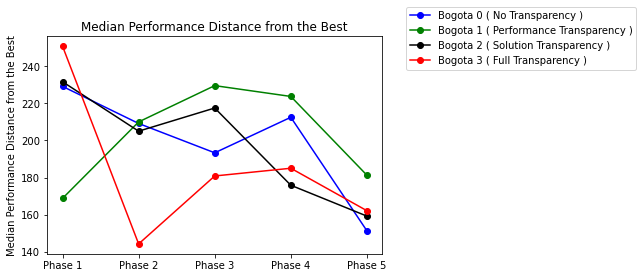

In [17]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = median_log_perform_bogota0
y2 = median_log_perform_bogota1
y3 = median_log_perform_bogota2
y4 = median_log_perform_bogota3

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Median Performance Distance from the Best")
plt.ylabel("Median Performance Distance from the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

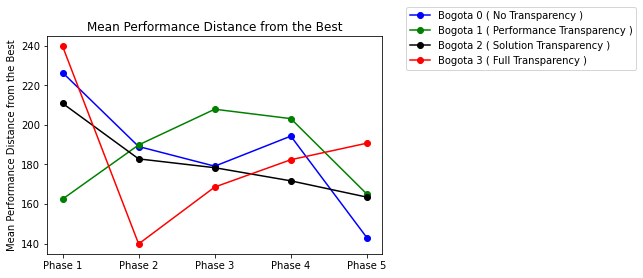

In [18]:
import matplotlib.pyplot as plt

# Mean Scores of All Groups [ Tech Scores ]

y1 = mean_log_perform_bogota0
y2 = mean_log_perform_bogota1
y3 = mean_log_perform_bogota2
y4 = mean_log_perform_bogota3

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Performance Distance from the Best")
plt.ylabel("Mean Performance Distance from the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## Similarity from the Best

In [19]:
bogota3_phase4_high_compare = df1[(df1['user1_phase'] != df1['user2_phase']) & (df1['user1'] != df1['user2']) & (df1['user1'] == bogota3_phase1_high)]
bogota3_phase3_high_compare = df2[(df2['user1_phase'] != df2['user2_phase']) & (df2['user1'] != df2['user2']) & (df2['user1'] == bogota3_phase2_high)]
bogota3_phase2_high_compare = df3[(df3['user1_phase'] != df3['user2_phase']) & (df3['user1'] != df3['user2']) & (df3['user1'] == bogota3_phase3_high)]
bogota3_phase1_high_compare = df4[(df4['user1_phase'] != df4['user2_phase']) & (df4['user1'] != df4['user2']) & (df4['user1'] == bogota3_phase4_high)]


bogota2_phase4_high_compare = df1_bogota2[(df1_bogota2['user1_phase'] != df1_bogota2['user2_phase']) & (df1_bogota2['user1'] != df1_bogota2['user2']) & (df1_bogota2['user1']==bogota2_phase1_high)]
bogota2_phase3_high_compare = df2_bogota2[(df2_bogota2['user1_phase'] != df2_bogota2['user2_phase']) & (df2_bogota2['user1'] != df2_bogota2['user2']) & (df2_bogota2['user1']==bogota2_phase2_high)]
bogota2_phase2_high_compare = df3_bogota2[(df3_bogota2['user1_phase'] != df3_bogota2['user2_phase']) & (df3_bogota2['user1'] != df3_bogota2['user2']) & (df3_bogota2['user1']==bogota2_phase3_high)]
bogota2_phase1_high_compare = df4_bogota2[(df4_bogota2['user1_phase'] != df4_bogota2['user2_phase']) & (df4_bogota2['user1'] != df4_bogota2['user2']) & (df4_bogota2['user1']==bogota2_phase4_high)]


bogota1_phase4_high_compare = df1_bogota1[(df1_bogota1['user1_phase'] != df1_bogota1['user2_phase']) & (df1_bogota1['user1'] != df1_bogota1['user2']) & (df1_bogota1['user1']==bogota1_phase1_high)]
bogota1_phase3_high_compare = df2_bogota1[(df2_bogota1['user1_phase'] != df2_bogota1['user2_phase']) & (df2_bogota1['user1'] != df2_bogota1['user2']) & (df2_bogota1['user1']==bogota1_phase2_high)]
bogota1_phase2_high_compare = df3_bogota1[(df3_bogota1['user1_phase'] != df3_bogota1['user2_phase']) & (df3_bogota1['user1'] != df3_bogota1['user2']) & (df3_bogota1['user1']==bogota1_phase3_high)]
bogota1_phase1_high_compare = df4_bogota1[(df4_bogota1['user1_phase'] != df4_bogota1['user2_phase']) & (df4_bogota1['user1'] != df4_bogota1['user2']) & (df4_bogota1['user1']==bogota1_phase4_high)]


bogota0_phase4_high_compare = df1_bogota0[(df1_bogota0['user1_phase'] != df1_bogota0['user2_phase']) & (df1_bogota0['user1'] != df1_bogota0['user2']) & (df1_bogota0['user1']==bogota0_phase1_high)]
bogota0_phase3_high_compare = df2_bogota0[(df2_bogota0['user1_phase'] != df2_bogota0['user2_phase']) & (df2_bogota0['user1'] != df2_bogota0['user2']) & (df2_bogota0['user1']==bogota0_phase2_high)]
bogota0_phase2_high_compare = df3_bogota0[(df3_bogota0['user1_phase'] != df3_bogota0['user2_phase']) & (df3_bogota0['user1'] != df3_bogota0['user2']) & (df3_bogota0['user1']==bogota0_phase3_high)]
bogota0_phase1_high_compare = df4_bogota0[(df4_bogota0['user1_phase'] != df4_bogota0['user2_phase']) & (df4_bogota0['user1'] != df4_bogota0['user2']) & (df4_bogota0['user1']==bogota0_phase4_high)]



/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

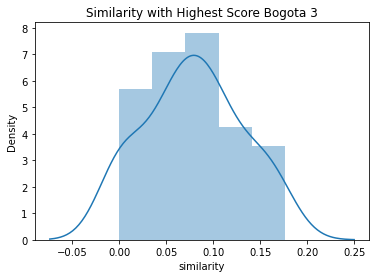

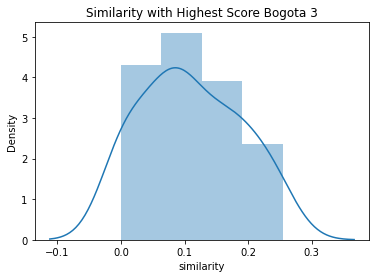

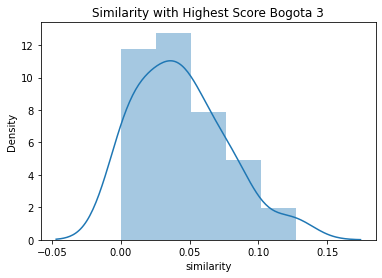

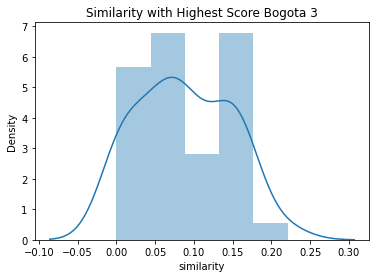

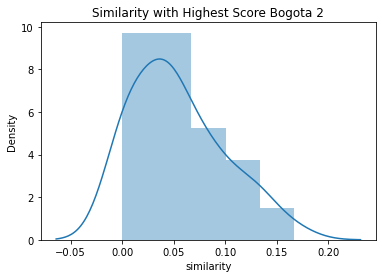

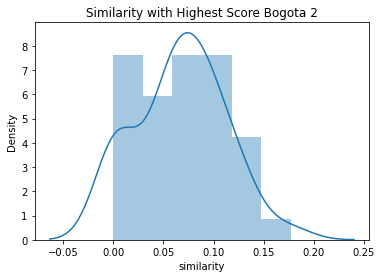

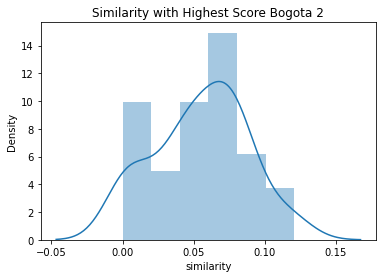

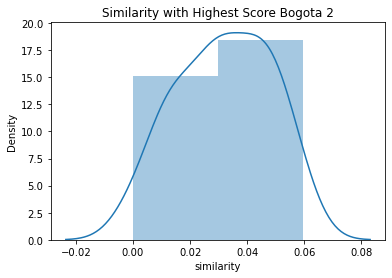

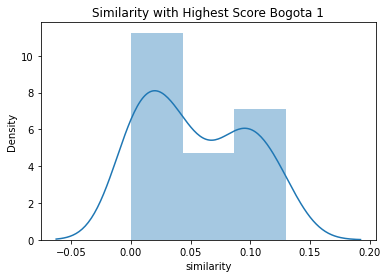

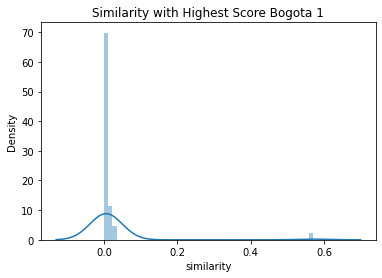

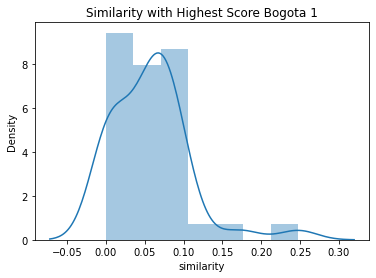

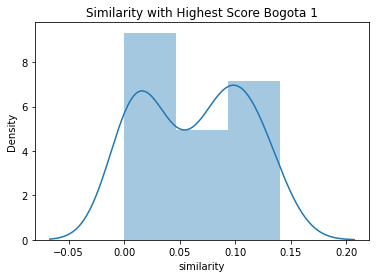

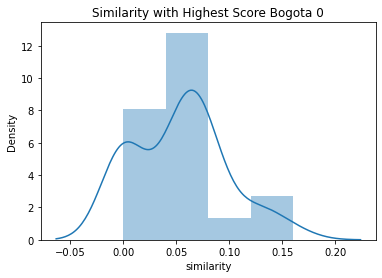

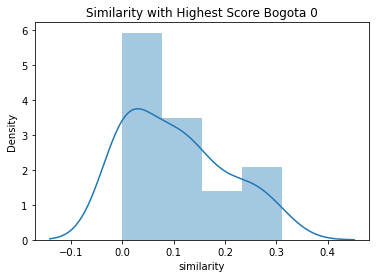

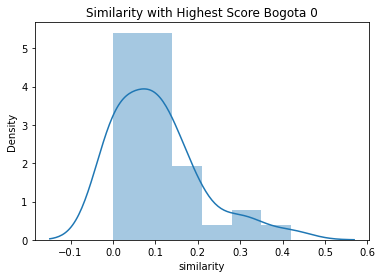

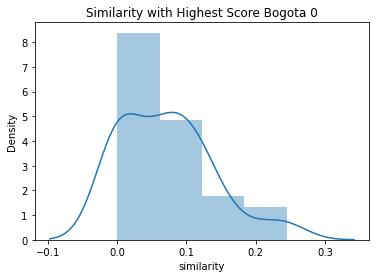

In [20]:
median_log_best_bogota3 = []
median_log_best_bogota2 = []
median_log_best_bogota1 = []
median_log_best_bogota0 = []

mean_log_best_bogota3 = []
mean_log_best_bogota2 = []
mean_log_best_bogota1 = []
mean_log_best_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []


for df in [bogota3_phase1_high_compare, bogota3_phase2_high_compare, bogota3_phase3_high_compare, bogota3_phase4_high_compare]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_best_bogota3.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_best_bogota3.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota3.append(max_value)
    plt.figure()
    plt.title("Similarity with Highest Score Bogota 3")
    sns.distplot(np.log(df['similarity']+1))

for df in [bogota2_phase1_high_compare, bogota2_phase2_high_compare, bogota2_phase3_high_compare, bogota2_phase4_high_compare]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_best_bogota2.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_best_bogota2.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota2.append(max_value)
    plt.figure()
    plt.title("Similarity with Highest Score Bogota 2")
    sns.distplot(np.log(df['similarity']+1))
    
for df in [bogota1_phase1_high_compare, bogota1_phase2_high_compare, bogota1_phase3_high_compare, bogota1_phase4_high_compare]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_best_bogota1.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_best_bogota1.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota1.append(max_value)
    plt.figure()
    plt.title("Similarity with Highest Score Bogota 1")
    sns.distplot(np.log(df['similarity']+1))

for df in [bogota0_phase1_high_compare, bogota0_phase2_high_compare, bogota0_phase3_high_compare, bogota0_phase4_high_compare]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_best_bogota0.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_best_bogota0.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota0.append(max_value)
    plt.figure()
    plt.title("Similarity with Highest Score Bogota 0")
    sns.distplot(np.log(df['similarity']+1))
    

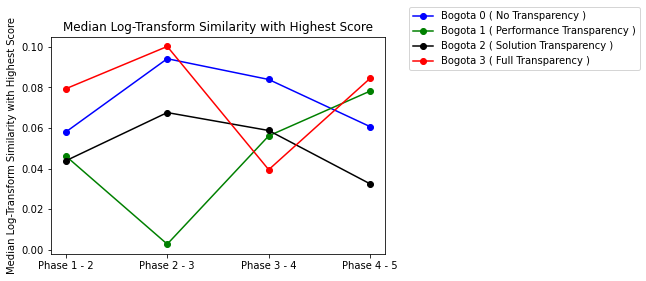

In [21]:
import matplotlib.pyplot as plt

y1 = median_log_best_bogota0
y2 = median_log_best_bogota1
y3 = median_log_best_bogota2
y4 = median_log_best_bogota3

x_axis=['Phase 1 - 2', 'Phase 2 - 3', 'Phase 3 - 4', 'Phase 4 - 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Median Log-Transform Similarity with Highest Score")
plt.ylabel("Median Log-Transform Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

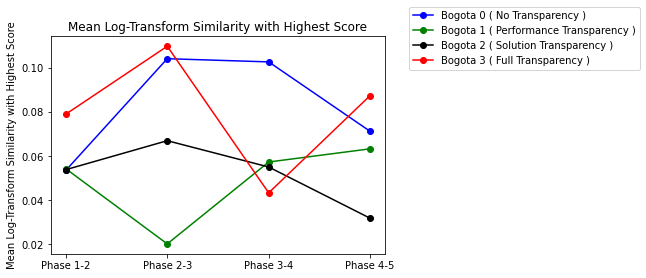

In [22]:
import matplotlib.pyplot as plt

y1 = mean_log_best_bogota0
y2 = mean_log_best_bogota1
y3 = mean_log_best_bogota2
y4 = mean_log_best_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Log-Transform Similarity with Highest Score")
plt.ylabel("Mean Log-Transform Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

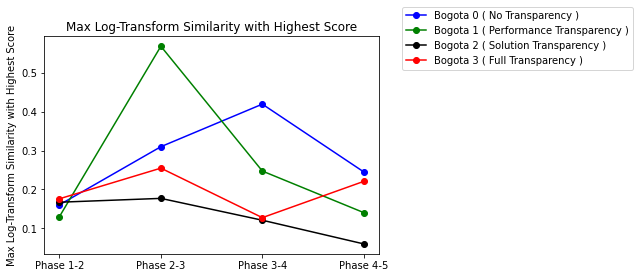

In [23]:
import matplotlib.pyplot as plt

y1 = max_log_bogota0
y2 = max_log_bogota1
y3 = max_log_bogota2
y4 = max_log_bogota3

x_axis=['Phase 1-2', 'Phase 2-3', 'Phase 3-4', 'Phase 4-5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Max Log-Transform Similarity with Highest Score")
plt.ylabel("Max Log-Transform Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

## T-test on Performance Distance

In [24]:
from itertools import combinations
from scipy import stats as st

df = bogota_final[['Group','abs_perform_diff_best_phase1','abs_perform_diff_best_phase2', 'abs_perform_diff_best_phase3' , 'abs_perform_diff_best_phase4', 'abs_perform_diff_best_phase5']]

def all_pairwise(df, compare_col = 'Group'):
    decade_pairs = [(i,j) for i, j in combinations(df[compare_col].unique().tolist(), 2)]
    # or add a list of colnames to function signature
    cols = list(df.columns)
    cols.remove(compare_col)
    list_of_dfs = []
    for pair in decade_pairs:
        for col in cols:
            c1 = df[df[compare_col] == pair[0]][col]
            c2 = df[df[compare_col] == pair[1]][col]
            results = st.ttest_ind(c1, c2, nan_policy='omit')
            tmp = pd.DataFrame({'group1': pair[0],
                                'group2': pair[1],
                                'tstat': results.statistic,
                                'pvalue': results.pvalue}, index = [col])
            list_of_dfs.append(tmp)
    df_stats = pd.concat(list_of_dfs)
    return df_stats

df_stats = all_pairwise(df)
df_stats

,group1,group2,tstat,pvalue
abs_perform_diff_best_phase1,0,1,1.661373,0.100653
abs_perform_diff_best_phase2,0,1,-2.430520,0.017373
abs_perform_diff_best_phase3,0,1,-0.426686,0.670784
abs_perform_diff_best_phase4,0,1,0.478841,0.633391
abs_perform_diff_best_phase5,0,1,1.108754,0.270943
abs_perform_diff_best_phase1,0,2,4.842724,0.000006
abs_perform_diff_best_phase2,0,2,-2.941031,0.004290
abs_perform_diff_best_phase3,0,2,-1.867402,0.065554
abs_perform_diff_best_phase4,0,2,-0.950317,0.344850
abs_perform_diff_best_phase5,0,2,1.061807,0.291558


## T-test on similarity with highest score

In [25]:
# T-tests between Bogota 1 and Bogota 3

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [bogota3_phase1_high_compare, bogota3_phase2_high_compare, bogota3_phase3_high_compare, bogota3_phase4_high_compare], [bogota1_phase1_high_compare, bogota1_phase2_high_compare, bogota1_phase3_high_compare, bogota1_phase4_high_compare] 
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(list1[x]['similarity']+1), np.log(list2[y]['similarity']+1))
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

,group1,group2,statistics,pvalue


In [26]:
# T-tests between Bogota 2 and Bogota 3

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [bogota2_phase1_high_compare, bogota2_phase2_high_compare, bogota2_phase3_high_compare, bogota2_phase4_high_compare], [bogota1_phase1_high_compare, bogota1_phase2_high_compare, bogota1_phase3_high_compare, bogota1_phase4_high_compare] 
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(list1[x]['similarity']+1), np.log(list2[y]['similarity']+1))
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

,group1,group2,statistics,pvalue


In [27]:
# T-tests between Bogota 0 and Bogota 3

def retrieve_name(var):
   callers_local_vars = inspect.currentframe().f_back.f_globals.items()
   return [var_name for var_name, var_val in callers_local_vars if var_val is var][0]

list1,list2 = [bogota0_phase1_high_compare, bogota0_phase2_high_compare, bogota0_phase3_high_compare, bogota0_phase4_high_compare], [bogota3_phase1_high_compare, bogota3_phase2_high_compare, bogota3_phase3_high_compare, bogota3_phase4_high_compare] 
results = []
for x in range(len(list1)):
    for y in range(len(list2)):
        
        name_list1 = retrieve_name(list1[x])
        name_list2 = retrieve_name(list2[y])
        ttest_result = ttest_ind(np.log(list1[x]['similarity']+1), np.log(list2[y]['similarity']+1))
        results.append([name_list1, name_list2, ttest_result[0], ttest_result[1]])
        
df = pd.DataFrame(results, columns=["group1", "group2", "statistics", "pvalue"])
df[df.group1.str.split("_", expand=True)[0] == df.group2.str.split("_", expand=True)[0]]

,group1,group2,statistics,pvalue


In [28]:
# store variables to be retrieved in correlation charts 

%store group0
%store group1
%store group2
%store group3

# store variables to be used in template similarity with best person
%store bogota_final

Stored 'group0' (DataFrame)
Stored 'group1' (DataFrame)
Stored 'group2' (DataFrame)
Stored 'group3' (DataFrame)
Stored 'bogota_final' (DataFrame)


## Similarity of Best Person in each Group with Template

In [29]:
bogota3_phase1_high_template = phase1_group3[phase1_group3['user1']==bogota3_phase1_high]
bogota3_phase2_high_template = phase2_group3[phase2_group3['user1']==bogota3_phase2_high]
bogota3_phase3_high_template = phase3_group3[phase3_group3['user1']==bogota3_phase3_high]
bogota3_phase4_high_template = phase4_group3[phase4_group3['user1']==bogota3_phase4_high]
bogota3_phase5_high_template = phase5_group3[phase5_group3['user1']==bogota3_phase5_high]

bogota2_phase1_high_template = phase1_group2[phase1_group2['user1']==bogota2_phase1_high]
bogota2_phase2_high_template = phase2_group2[phase2_group2['user1']==bogota2_phase2_high]
bogota2_phase3_high_template = phase3_group2[phase3_group2['user1']==bogota2_phase3_high]
bogota2_phase4_high_template = phase4_group2[phase4_group2['user1']==bogota2_phase4_high]
bogota2_phase5_high_template = phase5_group2[phase5_group2['user1']==bogota2_phase5_high]

bogota1_phase1_high_template = phase1_group1[phase1_group1['user1']==bogota1_phase1_high]
bogota1_phase2_high_template = phase2_group1[phase2_group1['user1']==bogota1_phase2_high]
bogota1_phase3_high_template = phase3_group1[phase3_group1['user1']==bogota1_phase3_high]
bogota1_phase4_high_template = phase4_group1[phase4_group1['user1']==bogota1_phase4_high]
bogota1_phase5_high_template = phase5_group1[phase5_group1['user1']==bogota1_phase5_high]

bogota0_phase1_high_template = phase1_group0[phase1_group0['user1']==bogota0_phase1_high]
bogota0_phase2_high_template = phase2_group0[phase2_group0['user1']==bogota0_phase2_high]
bogota0_phase3_high_template = phase3_group0[phase3_group0['user1']==bogota0_phase3_high]
bogota0_phase4_high_template = phase4_group0[phase4_group0['user1']==bogota0_phase4_high]
bogota0_phase5_high_template = phase5_group0[phase5_group0['user1']==bogota0_phase5_high]

In [30]:
median_log_bogota3 = []
median_log_bogota2 = []
median_log_bogota1 = []
median_log_bogota0 = []

mean_log_bogota3 = []
mean_log_bogota2 = []
mean_log_bogota1 = []
mean_log_bogota0 = []

max_log_bogota3 = []
max_log_bogota2 = []
max_log_bogota1 = []
max_log_bogota0 = []


for df in [bogota3_phase1_high_template, bogota3_phase2_high_template, bogota3_phase3_high_template, bogota3_phase4_high_template, bogota3_phase5_high_template ]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_bogota3.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_bogota3.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota3.append(max_value)
    

for df in [bogota2_phase1_high_template, bogota2_phase2_high_template, bogota2_phase3_high_template, bogota2_phase4_high_template, bogota2_phase5_high_template ]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_bogota2.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_bogota2.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota2.append(max_value)

    
for df in [bogota1_phase1_high_template, bogota1_phase2_high_template, bogota1_phase3_high_template, bogota1_phase4_high_template, bogota1_phase5_high_template ]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_bogota1.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_bogota1.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota1.append(max_value)


for df in [bogota0_phase1_high_template, bogota0_phase2_high_template, bogota0_phase3_high_template, bogota0_phase4_high_template, bogota0_phase5_high_template ]:
    median_value = (np.log(df['similarity']+1)).median()
    median_log_bogota0.append(median_value)
    mean_value = (np.log(df['similarity']+1)).mean()
    mean_log_bogota0.append(mean_value)
    max_value = (np.log(df['similarity']+1)).max()
    max_log_bogota0.append(max_value)
    
    

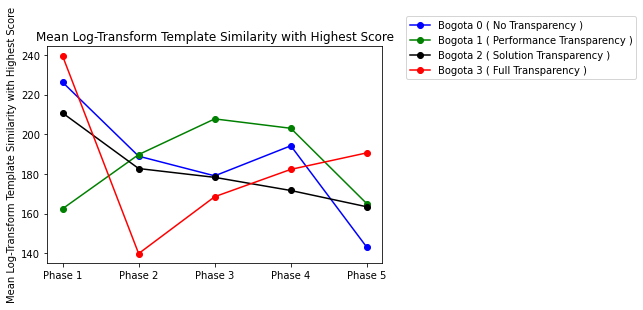

In [31]:
import matplotlib.pyplot as plt

y1 = mean_log_perform_bogota0
y2 = mean_log_perform_bogota1
y3 = mean_log_perform_bogota2
y4 = mean_log_perform_bogota3

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Log-Transform Template Similarity with Highest Score")
plt.ylabel("Mean Log-Transform Template Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

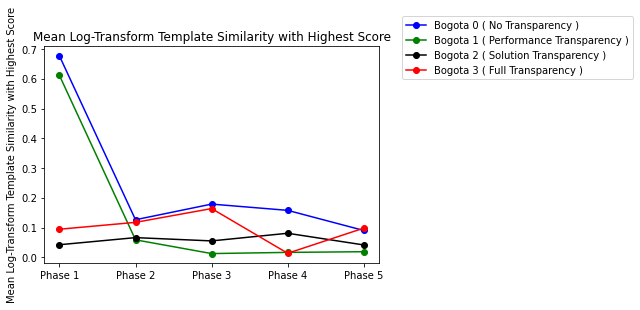

In [32]:
import matplotlib.pyplot as plt

y1 = median_log_bogota0
y2 = median_log_bogota1
y3 = median_log_bogota2
y4 = median_log_bogota3

x_axis=['Phase 1', 'Phase 2', 'Phase 3', 'Phase 4', 'Phase 5']

line1 = plt.plot(x_axis, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x_axis, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x_axis, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x_axis, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

plt.title("Mean Log-Transform Template Similarity with Highest Score")
plt.ylabel("Mean Log-Transform Template Similarity with Highest Score")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)



## x-axis is the median/mean similarity from the best and y-axis is the median/mean similarity with template

In [33]:
mean_log_best_bogota0

[0.05353357057601538,
 0.10417859165869037,
 0.10273124696829597,
 0.07123894770548177]

In [34]:
mean_log_template_bogota0

[0.08172810400937065,
 0.12311902049544846,
 0.11802358484733003,
 0.11160260393994273,
 0.10984176573284918]

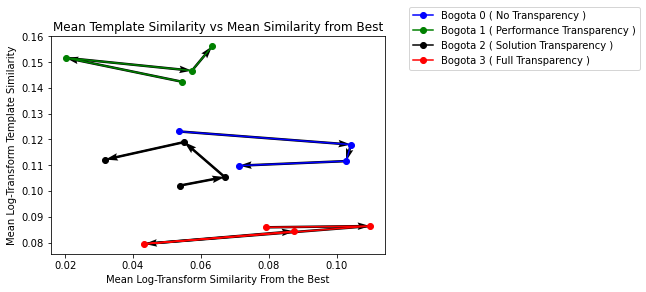

In [35]:
import matplotlib.pyplot as plt

x1 = mean_log_best_bogota0
x2 = mean_log_best_bogota1
x3 = mean_log_best_bogota2
x4 = mean_log_best_bogota3

del mean_log_template_bogota0[0]
del mean_log_template_bogota1[0]
del mean_log_template_bogota2[0]
del mean_log_template_bogota3[0]

y1 = mean_log_template_bogota0
y2 = mean_log_template_bogota1
y3 = mean_log_template_bogota2
y4 = mean_log_template_bogota3

deltaX1, deltaX2, deltaX3, deltaX4 = [np.diff(x) for x in [x1, x2, x3, x4]]
deltaY1, deltaY2, deltaY3, deltaY4 = [np.diff(y) for y in [y1, y2, y3, y4]]

line1 = plt.plot(x1, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x2, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x3, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x4, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

arrows1 = plt.quiver(x1[:-1], y1[:-1], deltaX1, deltaY1, scale_units='xy', angles='xy', scale=1)
arrows2 = plt.quiver(x2[:-1], y2[:-1], deltaX2, deltaY2, scale_units='xy', angles='xy', scale=1)
arrows3 = plt.quiver(x3[:-1], y3[:-1], deltaX3, deltaY3, scale_units='xy', angles='xy', scale=1)
arrows4 = plt.quiver(x4[:-1], y4[:-1], deltaX4, deltaY4, scale_units='xy', angles='xy', scale=1)

plt.title("Mean Template Similarity vs Mean Similarity from Best")
plt.ylabel("Mean Log-Transform Template Similarity")
plt.xlabel("Mean Log-Transform Similarity From the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)


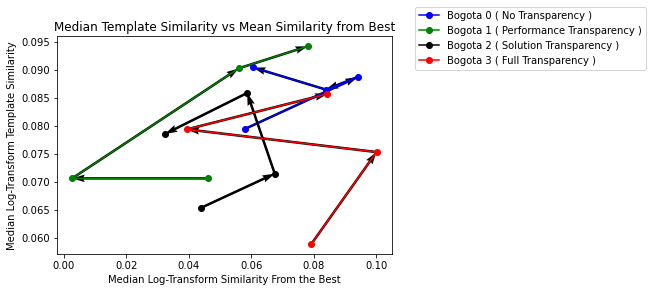

In [36]:
import matplotlib.pyplot as plt

x1 = median_log_best_bogota0
x2 = median_log_best_bogota1
x3 = median_log_best_bogota2
x4 = median_log_best_bogota3

del median_log_template_bogota0[0]
del median_log_template_bogota1[0]
del median_log_template_bogota2[0]
del median_log_template_bogota3[0]

y1 = median_log_template_bogota0
y2 = median_log_template_bogota1
y3 = median_log_template_bogota2
y4 = median_log_template_bogota3

deltaX1, deltaX2, deltaX3, deltaX4 = [np.diff(x) for x in [x1, x2, x3, x4]]
deltaY1, deltaY2, deltaY3, deltaY4 = [np.diff(y) for y in [y1, y2, y3, y4]]


line1 = plt.plot(x1, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x2, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x3, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x4, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

arrows1 = plt.quiver(x1[:-1], y1[:-1], deltaX1, deltaY1, scale_units='xy', angles='xy', scale=1)
arrows2 = plt.quiver(x2[:-1], y2[:-1], deltaX2, deltaY2, scale_units='xy', angles='xy', scale=1)
arrows3 = plt.quiver(x3[:-1], y3[:-1], deltaX3, deltaY3, scale_units='xy', angles='xy', scale=1)
arrows4 = plt.quiver(x4[:-1], y4[:-1], deltaX4, deltaY4, scale_units='xy', angles='xy', scale=1)

plt.title("Median Template Similarity vs Mean Similarity from Best")
plt.ylabel("Median Log-Transform Template Similarity")
plt.xlabel("Median Log-Transform Similarity From the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)


## x-axis is the median/mean similarity from the best and y-axis is the performance distance from best

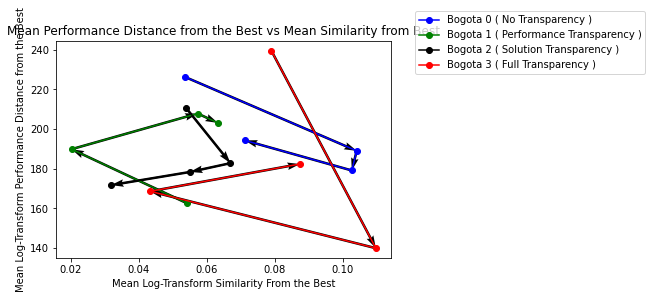

In [37]:
import matplotlib.pyplot as plt

x1 = mean_log_best_bogota0
x2 = mean_log_best_bogota1
x3 = mean_log_best_bogota2
x4 = mean_log_best_bogota3

del mean_log_perform_bogota0[-1]
del mean_log_perform_bogota1[-1]
del mean_log_perform_bogota2[-1]
del mean_log_perform_bogota3[-1]

y1 = mean_log_perform_bogota0
y2 = mean_log_perform_bogota1
y3 = mean_log_perform_bogota2
y4 = mean_log_perform_bogota3

deltaX1, deltaX2, deltaX3, deltaX4 = [np.diff(x) for x in [x1, x2, x3, x4]]
deltaY1, deltaY2, deltaY3, deltaY4 = [np.diff(y) for y in [y1, y2, y3, y4]]

line1 = plt.plot(x1, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x2, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x3, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x4, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

arrows1 = plt.quiver(x1[:-1], y1[:-1], deltaX1, deltaY1, scale_units='xy', angles='xy', scale=1)
arrows2 = plt.quiver(x2[:-1], y2[:-1], deltaX2, deltaY2, scale_units='xy', angles='xy', scale=1)
arrows3 = plt.quiver(x3[:-1], y3[:-1], deltaX3, deltaY3, scale_units='xy', angles='xy', scale=1)
arrows4 = plt.quiver(x4[:-1], y4[:-1], deltaX4, deltaY4, scale_units='xy', angles='xy', scale=1)

plt.title("Mean Performance Distance from the Best vs Mean Similarity from Best")
plt.ylabel("Mean Log-Transform Performance Distance from the Best")
plt.xlabel("Mean Log-Transform Similarity From the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)




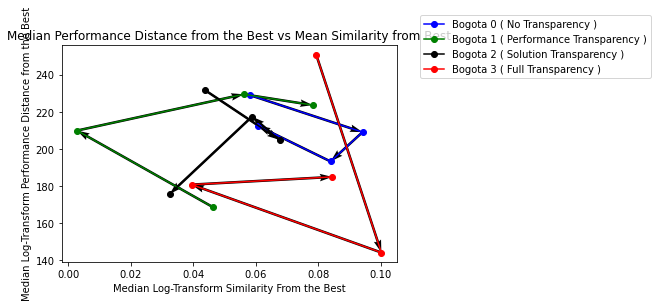

In [38]:
import matplotlib.pyplot as plt

x1 = median_log_best_bogota0
x2 = median_log_best_bogota1
x3 = median_log_best_bogota2
x4 = median_log_best_bogota3

del median_log_perform_bogota0[-1]
del median_log_perform_bogota1[-1]
del median_log_perform_bogota2[-1]
del median_log_perform_bogota3[-1]

y1 = median_log_perform_bogota0
y2 = median_log_perform_bogota1
y3 = median_log_perform_bogota2
y4 = median_log_perform_bogota3

deltaX1, deltaX2, deltaX3, deltaX4 = [np.diff(x) for x in [x1, x2, x3, x4]]
deltaY1, deltaY2, deltaY3, deltaY4 = [np.diff(y) for y in [y1, y2, y3, y4]]

line1 = plt.plot(x1, y1,'bo-',label='Bogota 0 ( No Transparency )') 
line2 = plt.plot(x2, y2,'go-',label='Bogota 1 ( Performance Transparency )') 
line3 = plt.plot(x3, y3,'ko-',label='Bogota 2 ( Solution Transparency )')
line4 = plt.plot(x4, y4,'ro-',label='Bogota 3 ( Full Transparency )') 

arrows1 = plt.quiver(x1[:-1], y1[:-1], deltaX1, deltaY1, scale_units='xy', angles='xy', scale=1)
arrows2 = plt.quiver(x2[:-1], y2[:-1], deltaX2, deltaY2, scale_units='xy', angles='xy', scale=1)
arrows3 = plt.quiver(x3[:-1], y3[:-1], deltaX3, deltaY3, scale_units='xy', angles='xy', scale=1)
arrows4 = plt.quiver(x4[:-1], y4[:-1], deltaX4, deltaY4, scale_units='xy', angles='xy', scale=1)

plt.title("Median Performance Distance from the Best vs Mean Similarity from Best")
plt.ylabel("Median Log-Transform Performance Distance from the Best")
plt.xlabel("Median Log-Transform Similarity From the Best")

plt.legend(bbox_to_anchor=(1.5, 1),
           bbox_transform=plt.gcf().transFigure)

In [39]:
%store bogota_final

Stored 'bogota_final' (DataFrame)


In [40]:
%store bogota0_phase4_high_compare
%store bogota0_phase3_high_compare
%store bogota0_phase2_high_compare
%store bogota0_phase1_high_compare

%store bogota1_phase4_high_compare
%store bogota1_phase3_high_compare
%store bogota1_phase2_high_compare
%store bogota1_phase1_high_compare

%store bogota2_phase4_high_compare
%store bogota2_phase3_high_compare
%store bogota2_phase2_high_compare
%store bogota2_phase1_high_compare

%store bogota3_phase4_high_compare
%store bogota3_phase3_high_compare
%store bogota3_phase2_high_compare
%store bogota3_phase1_high_compare

Stored 'bogota0_phase4_high_compare' (DataFrame)
Stored 'bogota0_phase3_high_compare' (DataFrame)
Stored 'bogota0_phase2_high_compare' (DataFrame)
Stored 'bogota0_phase1_high_compare' (DataFrame)
Stored 'bogota1_phase4_high_compare' (DataFrame)
Stored 'bogota1_phase3_high_compare' (DataFrame)
Stored 'bogota1_phase2_high_compare' (DataFrame)
Stored 'bogota1_phase1_high_compare' (DataFrame)
Stored 'bogota2_phase4_high_compare' (DataFrame)
Stored 'bogota2_phase3_high_compare' (DataFrame)
Stored 'bogota2_phase2_high_compare' (DataFrame)
Stored 'bogota2_phase1_high_compare' (DataFrame)
Stored 'bogota3_phase4_high_compare' (DataFrame)
Stored 'bogota3_phase3_high_compare' (DataFrame)
Stored 'bogota3_phase2_high_compare' (DataFrame)
Stored 'bogota3_phase1_high_compare' (DataFrame)
